# Day 5-1

# [作業目標]
- 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'國家': ['Taiwan', 'USA', 'UK'],
        '人口': list(np.random.randint(10000, 1000000, 3))}
df = pd.DataFrame(data)

In [3]:
print(df.iloc[df['人口'].idxmax()])

國家       USA
人口    837699
Name: 1, dtype: object


# Day 5-2

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [4]:
import pandas as pd
arrange_data = []
for item in data:
    line = item.split('\t')
    arrange_data.append(line)
    
df = pd.DataFrame(arrange_data)
df.head()

0                                                  1
0  n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1  n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2  n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3  n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4  n00015388_355  http://img100.imageshack.us/img100/3253/forres...

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [5]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
'''
plt.imshow(img)
plt.show()
'''

'\nplt.imshow(img)\nplt.show()\n'

In [8]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    """
    用 enumerate: 
        取得 url_list 的 index 和 element
    用 try, except:
        如果讀取圖片成功, 則將img存入img_list, 
        如果讀取圖片失敗, 則將0存入img_list 
    """
    for i,url in enumerate(url_list):
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
            print("get img%i (type:%s) successfully" % (i,type(img)))
            
            if len(img_list) >= 5: #成功讀取 5 張圖片就結束
                break
        except Exception as e:
            img_list.append(0)
            print("get img%i error: " % i + str(e))
        
    return img_list

get img0 (type:<class 'PIL.JpegImagePlugin.JpegImageFile'>) successfully
get img1 (type:<class 'PIL.JpegImagePlugin.JpegImageFile'>) successfully
get img2 (type:<class 'PIL.JpegImagePlugin.JpegImageFile'>) successfully
get img3 (type:<class 'PIL.JpegImagePlugin.JpegImageFile'>) successfully
get img4 error: cannot identify image file <_io.BytesIO object at 0x0000026866FBF888>
get img5 error: cannot identify image file <_io.BytesIO object at 0x0000026866FBF518>
get img6 error: cannot identify image file <_io.BytesIO object at 0x0000026866FBF518>
get img7 error: cannot identify image file <_io.BytesIO object at 0x0000026866FBF2B0>
get img8 error: cannot identify image file <_io.BytesIO object at 0x0000026866FBF678>
get img9 (type:<class 'PIL.JpegImagePlugin.JpegImageFile'>) successfully
Total images that we got: 5 


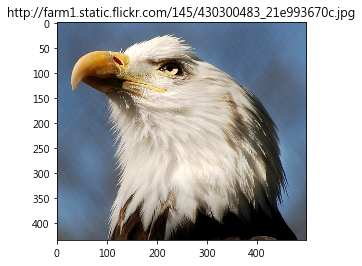

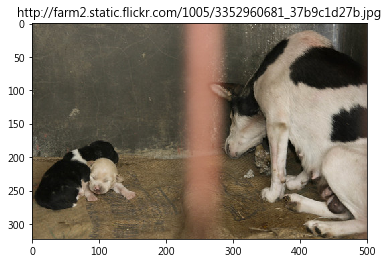

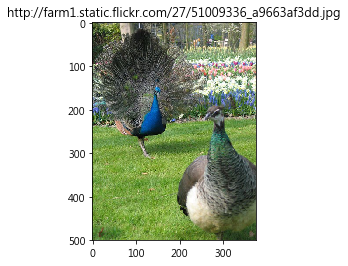

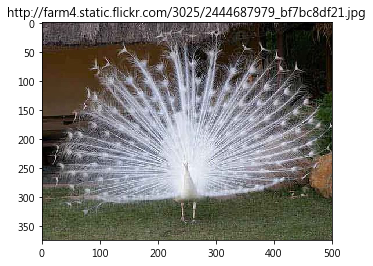

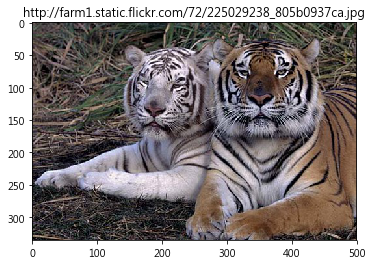

In [17]:
result = img2arr_fromURLs(df[:][1].values)
count = [element != 0 for element in result].count(True)
print("Total images that we got: %i " % count) # 如果不等於 5, 代表有些連結失效囉        

for i,im_get in enumerate(result):
    if im_get != 0:
        plt.title(df.iloc[i,1])
        plt.imshow(im_get)
        plt.show()       
